In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import ShuffleSplit
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [10]:
url ='https://raw.githubusercontent.com/digipodium/Datasets/main/regression/Mall_Customers.csv'
df = pd.read_csv(url)
X = df[['Spending Score (1-100)', 'Annual Income (k$)']]
shs = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in shs.split(X):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]


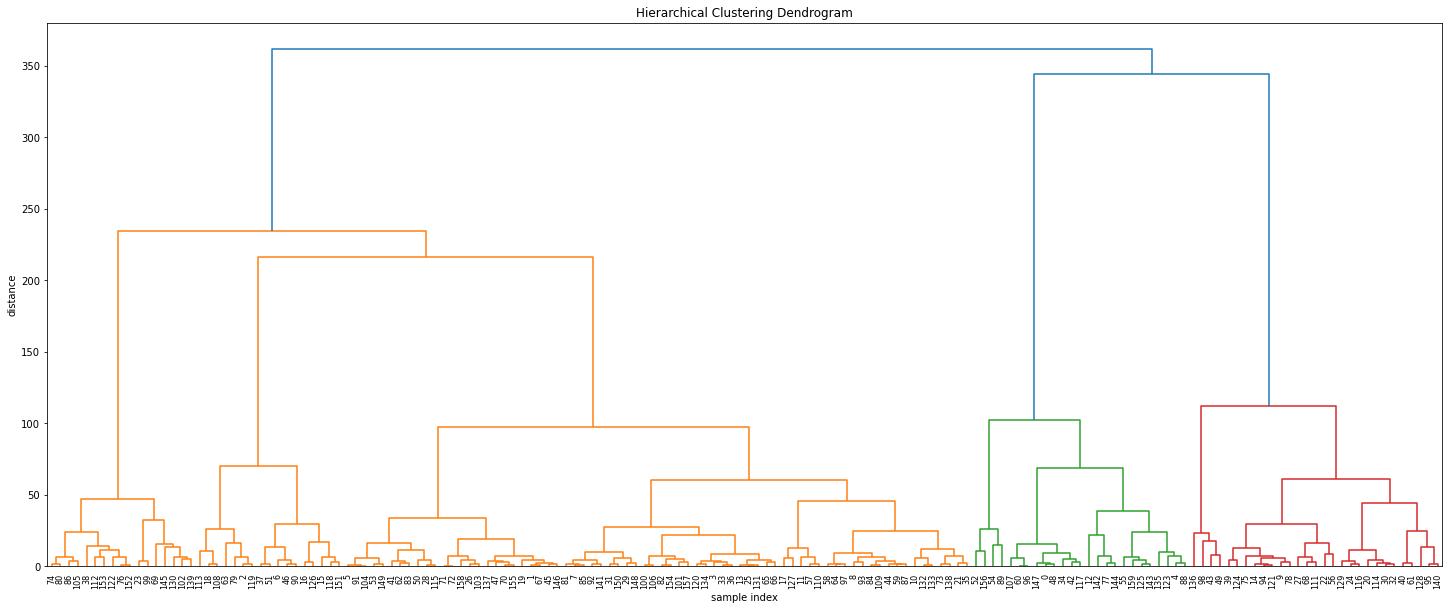

In [11]:
# draw dendrogram
Z = linkage(Xtrain, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90,  # rotates the x axis labels
    leaf_font_size=8,  # font size for the x axis labels
)
plt.show()

In [14]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(Xtrain)

AgglomerativeClustering(n_clusters=5)

In [15]:
df['group'] = model.fit_predict(df[['Spending Score (1-100)', 'Annual Income (k$)']])

In [17]:
px.scatter(df, x='Spending Score (1-100)', y='Annual Income (k$)', color='group',symbol='group')